<a id="section5"></a>
## 2.5 Mapping Points

In [25]:
# Your answer here

Choropleth maps are great, but mapping using point symbols enables us to visualize our spatial data in another way. If you know both mapping methods you can expand how much information you can show in one map. 

> Point maps are a great way to map `counts` because the varying sizes of areas are deemphasized.


### Creating a point geodataframe

We'll need to start by making a *point dataset* where instead of having the *polygons* of our individual tracts, we'll have *points*  in which the longitude and latitude are for the centroid of those polygons. 

First step will be to be to use the geodataframe `centroid` attribute to get the center point of each tract.

In [26]:
tracts_acs_gdf.centroid

0      POINT (-122.30409 37.83897)
1      POINT (-122.27022 37.76526)
2      POINT (-122.15511 37.72267)
3      POINT (-122.14709 37.70176)
4      POINT (-122.11355 37.69925)
                  ...             
355    POINT (-122.26601 37.78120)
356    POINT (-122.25110 37.76029)
357    POINT (-122.09693 37.70409)
358    POINT (-121.73693 37.67337)
359    POINT (-122.04577 37.65524)
Length: 360, dtype: geometry

We can create a new geodataframe `tracts_acs_gdf_point` that drops the geometry column and adds the centroid as the new geometry.

In [27]:
tracts_acs_gdf_point = gpd.GeoDataFrame(tracts_acs_gdf.loc[:,tracts_acs_gdf.columns!='geometry'], 
                            geometry=tracts_acs_gdf.centroid)

Use `type()` to make sure that it is indeed a geodataframe

In [28]:
type(tracts_acs_gdf_point)

geopandas.geodataframe.GeoDataFrame

And then confirm that the dataset looks like what you would expect it to (ie check the geometry column!)

In [29]:
tracts_acs_gdf_point.head(3)

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID   NAME_x LSAD  \
0      06      001  425101  1400000US06001425101  06001425101  4251.01   CT   
1      06      001  428600  1400000US06001428600  06001428600     4286   CT   
2      06      001  432600  1400000US06001432600  06001432600     4326   CT   

     ALAND   AWATER                                            NAME_y  ...  \
0   590870  2045459  Census Tract 4251.01, Alameda County, California  ...   
1   898967  1080420     Census Tract 4286, Alameda County, California  ...   
2  1673450        0     Census Tract 4326, Alameda County, California  ...   

   p_movestate  p_moveabroad     p_car  p_carpool  p_transit    p_bike  \
0     0.037154      0.025189  0.550998   0.107539   0.169623  0.015521   
1     0.036532      0.017686  0.550140   0.019048   0.270588  0.034734   
2     0.001667      0.013893  0.639507   0.063401   0.237097  0.000000   

     p_walk  pop_dens_km2  pop_dens_mi2                     geometry  
0  0.062084   2687.562408   6960.754386  POINT (-122.30409 37.83897)  
1  0.035294   3861.098350  10000.198392  POINT (-122.27022 37.76526)  
2  0.035630   4370.611611  11319.831624  POINT (-122.15511 37.72267)  

[3 rows x 56 columns]

Now let's plot our new point geodataframe.

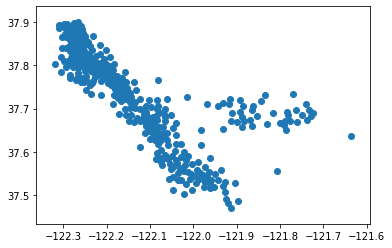

In [30]:
tracts_acs_gdf_point.plot()
plt.show()

### Proportional Color Maps
**Proportional color maps** linearly scale the `color` of a point symbol by the data values.

Let's try this by creating a map of total population (c_race).

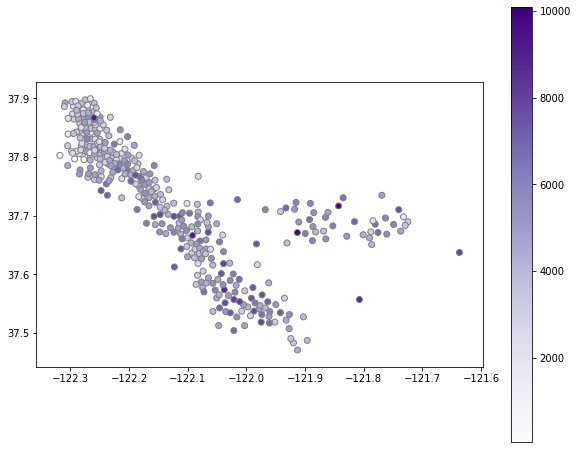

In [31]:
tracts_acs_gdf_point.plot(column="c_race", cmap="Purples", edgecolor="grey", figsize=(10,8), legend=True)
plt.show()

When you see that continuous color bar in the legend you know that the mapping of data values to colors is not classified.


### Graduated Color Maps

We can also create **graduated color maps** by binning data values before associating them with colors. These are just like choropleth maps but that term is used for polygon data. 

Graduated color maps use the same syntax as the choropleth maps above - you create them by setting a value for `scheme`. 

Below, we copy the code we used above to create a choropleth, but we change the name of the geodataframe to use the point gdf. 

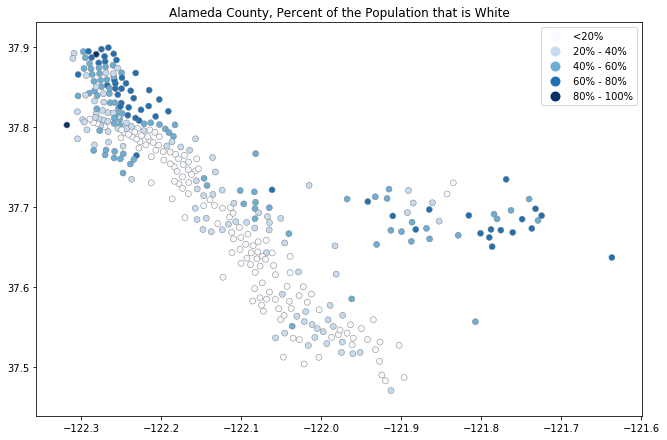

In [32]:
fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
tracts_acs_gdf_point.plot(column=(tracts_acs_gdf_point['p_white'] * 100), 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':[20,40,60,80]},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=50,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['<20%','20% - 40%','40% - 60%','60% - 80%','80% - 100%']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Alameda County, Percent of the Population that is White")
plt.show()

The syntax for a choropleth and graduated color map is the same, although some options only apply to one or the other.

- Uncomment the `markersize` parameter above to see how you can further customize a graduated color map.

#### Exercise

Repeat the previous map of `p_white` and experiment with the different values for the plot.


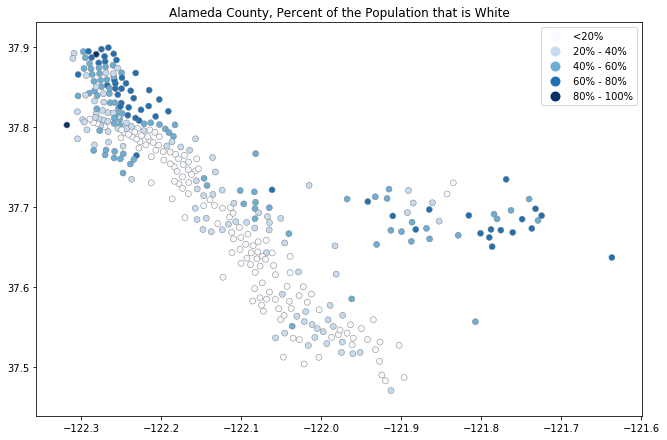

In [33]:
# EDIT THIS CODE

fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
tracts_acs_gdf_point.plot(column=(tracts_acs_gdf_point['p_white'] * 100), 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':[20,40,60,80]},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=50,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['<20%','20% - 40%','40% - 60%','60% - 80%','80% - 100%']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Alameda County, Percent of the Population that is White")
plt.show()

### Proportional Symbol Maps

Instead of changing the `color `of the points based on the data values, we can change their `size`.

Say we want to analyze how many renters there are in each tract using our variable `c_renters`. Using the option `markersize` we can set the size of each of our points to correlate with how many renters are in the tract.

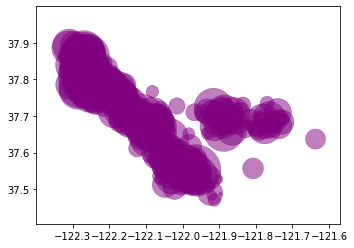

In [34]:
tracts_acs_gdf_point.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize='c_renters' # set size of point markers by the values in c_renters column
                         )
plt.show()

Oops! When we set the marker size by the column value our markers are too big. Let's try scaling them down so they don't overlap as much.

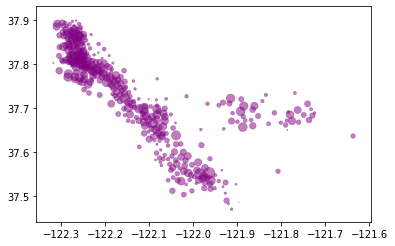

In [35]:
tracts_acs_gdf_point.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize=tracts_acs_gdf_point['c_renters']/20 # set marker size to value / 20
                         )
plt.show()

That's a bit better, but alas Goldilocks, it's still not quite right!

Instead of guessing how to adjust the values we can write a function to recode our values from the columns min and max to the marker size min and max.

In [36]:
def rescale_val(val, oldmin, oldmax, newmin, newmax):
    '''
    Rescale a value from a old range to a new range
    '''
    old_range = oldmax - oldmin
    new_range = newmax - newmin
    new_val = int((new_range * (val - oldmin)/ old_range) + newmin)
    return new_val


To see how our function works, let's apply it to our geodataframe.  

Here we set the output size for the markers to range from 10 to 500

In [37]:
rescale_val(tracts_acs_gdf_point['c_renters'][0],
        tracts_acs_gdf_point['c_renters'].min(),
        tracts_acs_gdf_point['c_renters'].max(),
        5,
        200)

46

In [38]:
tracts_acs_gdf_point['c_renters'].apply(lambda x: 
                                        rescale_val(x,
                                                    tracts_acs_gdf_point['c_renters'].min(),
                                                    tracts_acs_gdf_point['c_renters'].max(),
                                                    5,
                                                    200)
                                       )                                                           

0       46
1       60
2      154
3      124
4      154
      ... 
355     64
356    109
357     29
358     55
359     40
Name: c_renters, Length: 360, dtype: int64

Now, let's use the function to make our plot.

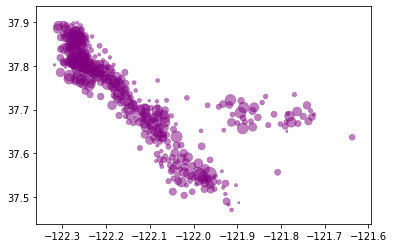

In [39]:
# Get our marker_sizes based on our column values
marker_sizes = tracts_acs_gdf_point['c_renters'].apply(lambda x: 
                                        rescale_val(x,
                                                    tracts_acs_gdf_point['c_renters'].min(),
                                                    tracts_acs_gdf_point['c_renters'].max(),
                                                    5,
                                                    200))        

# Create the point map
tracts_acs_gdf_point.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize= marker_sizes            
                         )
plt.show()

That's a lot of better, though the code looks a lot more complex!

Now let's overlay it over a map of our tract shapes.

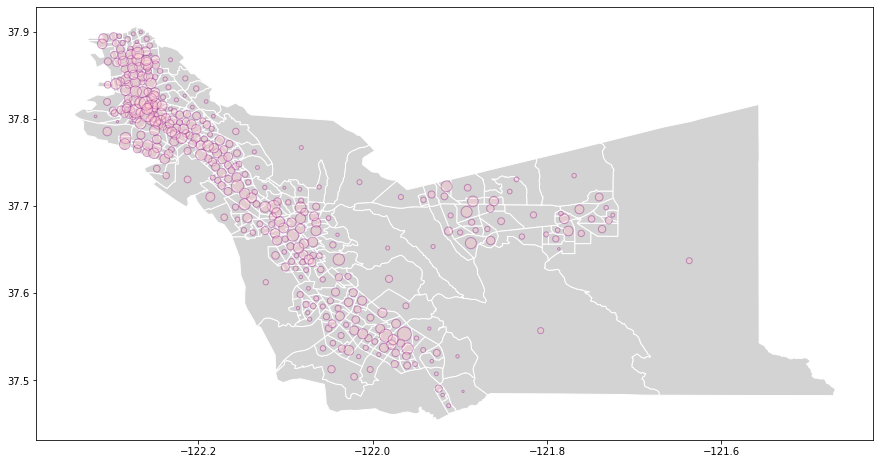

In [40]:
# Set up the plot with a bigger size
fig, ax = plt.subplots(figsize = (15,15)) 


# Add the census tract polygons as our background layer
tracts_acs_gdf.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

# Create a list of the marker sizes based on our data values
marker_sizes = tracts_acs_gdf_point['c_renters'].apply(lambda x: 
                                        rescale_val(x,
                                                    tracts_acs_gdf_point['c_renters'].min(),
                                                    tracts_acs_gdf_point['c_renters'].max(),
                                                    5,
                                                    200))
# Add the points to the map
tracts_acs_gdf_point.plot(ax=ax,
                          edgecolor='purple',
                          color="pink",  
                          alpha=0.35, 
                          linewidths=1,
                          legend=True,
                          markersize = marker_sizes
                        )      


plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="https://image.flaticon.com/icons/svg/87/87705.svg" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

Any thoughts about the above map? 
- What works? 
- What didn't work?
- How does the alpha value affect the map?

In [41]:
# Write your thoughts here

> **Pro-tip**: Unfortunately, `Geopandas.plot` does not provide an easy way to add legends to point symbol maps!

### Graduated symbol maps

`Graduated symbol maps` are also a great method for mapping points.  These are just like graduated color maps but instead of associating symbol color with data values they associate point size. Similarly,graduated symbol maps use `classification schemes` to set the size of point symbols. 

> We demonstrate how to make graduated symbol maps along with some other mapping techniques in the `Optional Mapping notebook` which we encourage you to explore on your own.

In [ ]:
<a id="section5"></a>
## 2.5 Mapping Points

# Your answer here

Choropleth maps are great, but mapping using point symbols enables us to visualize our spatial data in another way. If you know both mapping methods you can expand how much information you can show in one map. 

> Point maps are a great way to map `counts` because the varying sizes of areas are deemphasized.


### Creating a point geodataframe

We'll need to start by making a *point dataset* where instead of having the *polygons* of our individual tracts, we'll have *points*  in which the longitude and latitude are for the centroid of those polygons. 

First step will be to be to use the geodataframe `centroid` attribute to get the center point of each tract.

tracts_acs_gdf.centroid

We can create a new geodataframe `tracts_acs_gdf_point` that drops the geometry column and adds the centroid as the new geometry.

tracts_acs_gdf_point = gpd.GeoDataFrame(tracts_acs_gdf.loc[:,tracts_acs_gdf.columns!='geometry'], 
                            geometry=tracts_acs_gdf.centroid)

Use `type()` to make sure that it is indeed a geodataframe

type(tracts_acs_gdf_point)

And then confirm that the dataset looks like what you would expect it to (ie check the geometry column!)

tracts_acs_gdf_point.head(3)

Now let's plot our new point geodataframe.

tracts_acs_gdf_point.plot()
plt.show()

### Proportional Color Maps
**Proportional color maps** linearly scale the `color` of a point symbol by the data values.

Let's try this by creating a map of total population (c_race).

tracts_acs_gdf_point.plot(column="c_race", cmap="Purples", edgecolor="grey", figsize=(10,8), legend=True)
plt.show()

When you see that continuous color bar in the legend you know that the mapping of data values to colors is not classified.


### Graduated Color Maps

We can also create **graduated color maps** by binning data values before associating them with colors. These are just like choropleth maps but that term is used for polygon data. 

Graduated color maps use the same syntax as the choropleth maps above - you create them by setting a value for `scheme`. 

Below, we copy the code we used above to create a choropleth, but we change the name of the geodataframe to use the point gdf. 

fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
tracts_acs_gdf_point.plot(column=(tracts_acs_gdf_point['p_white'] * 100), 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':[20,40,60,80]},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=50,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['<20%','20% - 40%','40% - 60%','60% - 80%','80% - 100%']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Alameda County, Percent of the Population that is White")
plt.show()

The syntax for a choropleth and graduated color map is the same, although some options only apply to one or the other.

- Uncomment the `markersize` parameter above to see how you can further customize a graduated color map.

#### Exercise

Repeat the previous map of `p_white` and experiment with the different values for the plot.


# EDIT THIS CODE

fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
tracts_acs_gdf_point.plot(column=(tracts_acs_gdf_point['p_white'] * 100), 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':[20,40,60,80]},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=50,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['<20%','20% - 40%','40% - 60%','60% - 80%','80% - 100%']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Alameda County, Percent of the Population that is White")
plt.show()

### Proportional Symbol Maps

Instead of changing the `color `of the points based on the data values, we can change their `size`.

Say we want to analyze how many renters there are in each tract using our variable `c_renters`. Using the option `markersize` we can set the size of each of our points to correlate with how many renters are in the tract.

tracts_acs_gdf_point.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize='c_renters' # set size of point markers by the values in c_renters column
                         )
plt.show()

Oops! When we set the marker size by the column value our markers are too big. Let's try scaling them down so they don't overlap as much.

tracts_acs_gdf_point.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize=tracts_acs_gdf_point['c_renters']/20 # set marker size to value / 20
                         )
plt.show()

That's a bit better, but alas Goldilocks, it's still not quite right!

Instead of guessing how to adjust the values we can write a function to recode our values from the columns min and max to the marker size min and max.

def rescale_val(val, oldmin, oldmax, newmin, newmax):
    '''
    Rescale a value from a old range to a new range
    '''
    old_range = oldmax - oldmin
    new_range = newmax - newmin
    new_val = int((new_range * (val - oldmin)/ old_range) + newmin)
    return new_val


To see how our function works, let's apply it to our geodataframe.  

Here we set the output size for the markers to range from 10 to 500

rescale_val(tracts_acs_gdf_point['c_renters'][0],
        tracts_acs_gdf_point['c_renters'].min(),
        tracts_acs_gdf_point['c_renters'].max(),
        5,
        200)

tracts_acs_gdf_point['c_renters'].apply(lambda x: 
                                        rescale_val(x,
                                                    tracts_acs_gdf_point['c_renters'].min(),
                                                    tracts_acs_gdf_point['c_renters'].max(),
                                                    5,
                                                    200)
                                       )                                                           

Now, let's use the function to make our plot.

# Get our marker_sizes based on our column values
marker_sizes = tracts_acs_gdf_point['c_renters'].apply(lambda x: 
                                        rescale_val(x,
                                                    tracts_acs_gdf_point['c_renters'].min(),
                                                    tracts_acs_gdf_point['c_renters'].max(),
                                                    5,
                                                    200))        

# Create the point map
tracts_acs_gdf_point.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize= marker_sizes            
                         )
plt.show()

That's a lot of better, though the code looks a lot more complex!

Now let's overlay it over a map of our tract shapes.

# Set up the plot with a bigger size
fig, ax = plt.subplots(figsize = (15,15)) 


# Add the census tract polygons as our background layer
tracts_acs_gdf.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

# Create a list of the marker sizes based on our data values
marker_sizes = tracts_acs_gdf_point['c_renters'].apply(lambda x: 
                                        rescale_val(x,
                                                    tracts_acs_gdf_point['c_renters'].min(),
                                                    tracts_acs_gdf_point['c_renters'].max(),
                                                    5,
                                                    200))
# Add the points to the map
tracts_acs_gdf_point.plot(ax=ax,
                          edgecolor='purple',
                          color="pink",  
                          alpha=0.35, 
                          linewidths=1,
                          legend=True,
                          markersize = marker_sizes
                        )      


plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="https://image.flaticon.com/icons/svg/87/87705.svg" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

Any thoughts about the above map? 
- What works? 
- What didn't work?
- How does the alpha value affect the map?

# Write your thoughts here

> **Pro-tip**: Unfortunately, `Geopandas.plot` does not provide an easy way to add legends to point symbol maps!

### Graduated symbol maps

`Graduated symbol maps` are also a great method for mapping points.  These are just like graduated color maps but instead of associating symbol color with data values they associate point size. Similarly,graduated symbol maps use `classification schemes` to set the size of point symbols. 

> We demonstrate how to make graduated symbol maps along with some other mapping techniques in the `Optional Mapping notebook` which we encourage you to explore on your own.